# SIMPLE LINEAR REGRESSION


A linear regression is a supervised Machine learning model. The goal of a supervised model is to learn from the input and the output to predict new output with new input correctly...

In [1]:
import numpy as np
import polars as pl
import kagglehub
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
#get data from kaggle
# Download latest version
path = kagglehub.dataset_download("devzohaib/tvmarketingcsv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\33649\.cache\kagglehub\datasets\devzohaib\tvmarketingcsv\versions\1


In [2]:
data = pl.read_csv("tvmarketing.csv")
print(data.head(10))

shape: (10, 2)
┌───────┬───────┐
│ TV    ┆ Sales │
│ ---   ┆ ---   │
│ f64   ┆ f64   │
╞═══════╪═══════╡
│ 230.1 ┆ 22.1  │
│ 44.5  ┆ 10.4  │
│ 17.2  ┆ 9.3   │
│ 151.5 ┆ 18.5  │
│ 180.8 ┆ 12.9  │
│ 8.7   ┆ 7.2   │
│ 57.5  ┆ 11.8  │
│ 120.2 ┆ 13.2  │
│ 8.6   ┆ 4.8   │
│ 199.8 ┆ 10.6  │
└───────┴───────┘


we will consider sales based on 'TV' marketing budget.
we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

"TV" is the independant variable
"Sales" is the dependable variable

Text(0, 0.5, 'Sales')

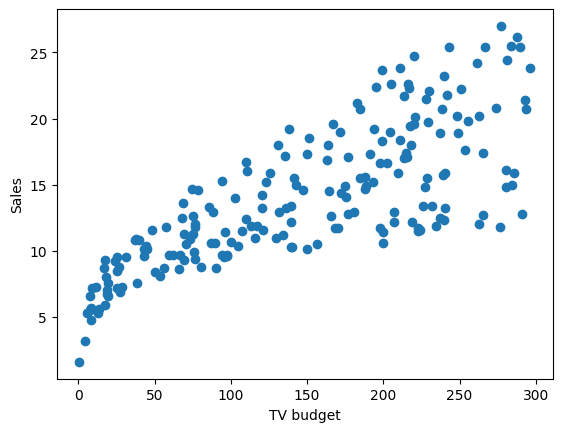

In [15]:
plt.scatter(x=data["TV"], y=data["Sales"])
plt.xlabel("TV budget")
plt.ylabel("Sales")

we are seing a positive relation between the amount of the budget and the sales

In [17]:
data.corr()

TV,Sales
f64,f64
1.0,0.782224
0.782224,1.0


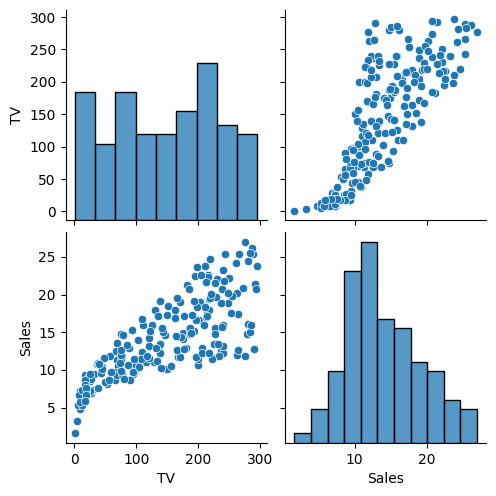

In [3]:
import seaborn as sns

sns.pairplot(data.to_pandas())

insights:

The scatter plot between TV and Sales shows a positive linear trend, indicating that as spending on TV advertising increases, sales tend to increase as well. This suggests a direct relationship between the two variables, where higher investments in TV advertisements are associated with higher sales.

## Model Training

The model learns from the dataset and tries to establish a relationship between x (TV) and 𝑦 (Sales)

In [13]:
df = data.to_pandas()

X = df[["TV"]] # dataframe format instead of df["TV"] (series) format
y = df["Sales"]

In [15]:
X.shape

(200, 1)

In [7]:
y.shape

(200,)

In [11]:
## Train Test Split. We need to divide our dataset to train, and to test our model. We won't use our test dataset in the training
## we want to know how well our model works with unknown data
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=000) #random_state it gives us the same splits

In [8]:
from sklearn.linear_model import LinearRegression

### Simple Linear Regression Equation

In simple linear regression, we model the relationship between a **dependent variable** $(y)$ (the value we want to predict) and an **independent variable** $(x)$ (the feature used for prediction) with a straight line.

#### Equation of the Line

The equation of a line is given by:

$$
y = mx + c
$$

where:
- **$(y)$**: The **dependent variable** (e.g., predicted height).
- **$(x)$**: The **independent variable** (e.g., weight).
- **$(m)$**: The **slope** of the line. This represents the amount $(y)$ changes when $(x)$ increases by 1 unit. The slope determines the tilt of the line.
- **$(c)$**: The **intercept**, which is the value of $(y)$ when $(x)$ is 0. It represents the point where the line crosses the $(y)$-axis.

In regression, we aim to find the optimal values of $(m)$ (slope) and $(c)$ (intercept) that minimize the prediction error for our dataset.

#### Hypothesis Function
The hypothesis function is a specific representation of this regression line. In machine learning, we often express it as:
$$
h_{\theta}(x) = \theta_0 + \theta_1 x
$$

where:
- $(h_{\theta}(x))$ is the prediction of $(y)$ for a given value of $(x)$.
- $(\theta_0)$ is the **intercept**, equivalent to $(c)$ in the line equation.
- $(\theta_1)$ is the **slope** or **coefficient**, equivalent to $(m)$ in the line equation.

The hypothesis function represents the best linear approximation of the relationship between $(x)$ and $(y)$ based on the dataset. The goal of linear regression is to determine the optimal values of $(\theta_0)$ and $(\theta_1)$ that minimize prediction errors.

In [60]:
#standardization and scaling allows us to converge more quickly in the global minima of our cost function
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #to avoid a data likage, our model should not get any information from the test data, so using fit_transform would be a terrible mistake

In [62]:
model = LinearRegression(n_jobs=-1)

In [63]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [64]:
print("Coefficient or slope:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient or slope: [3.89367275]
Intercept: 14.351333333333333


Text(0, 0.5, 'Sales')

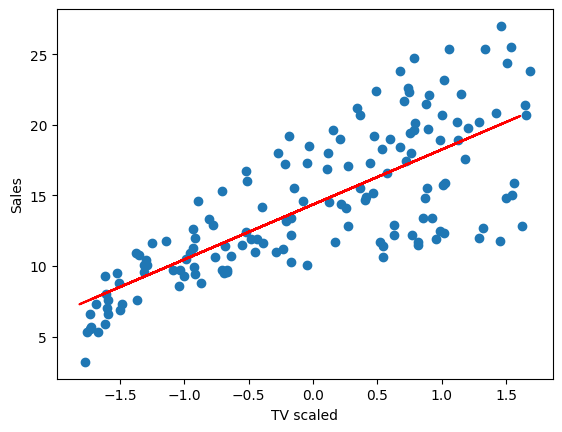

In [65]:
plt.scatter(X_train, y_train)
plt.plot(X_test, model.predict(X_test), 'r')
plt.xlabel("TV scaled")
plt.ylabel("Sales")

In [66]:
## Prediction for test data
y_pred= model.predict(X_test)

In [67]:
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error

In [68]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Mean squared error (MSE) : {mse}')
print(f'Mean Absolute error (MAE) : {mae}')
print(f'Root mean squared error (RMSE) : {rmse}')

Mean squared error (MSE) : 8.730248872947453
Mean Absolute error (MAE) : 2.2985133280390846
Root mean squared error (RMSE) : 2.954699455604149


In [69]:
score=r2_score(y_test,y_pred)
print(score)

0.6902574858002379


66% of R2, we can improve that... What if we try a ridge regularization

In [70]:
from sklearn.linear_model import Ridge

In [83]:
ridge=Ridge(alpha=0.0001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [84]:
y_pred=ridge.predict(X_test)

In [85]:
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2.2985134371367932
R2 Score 0.6902573958942327


Not working well..

### log transformation

In [99]:
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)

model = LinearRegression(n_jobs=-1)
model.fit(X_train_sqrt, y_train)

LinearRegression(n_jobs=-1)

In [100]:
print("Coefficient or slope:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient or slope: [0.98386848]
Intercept: 2.7987410224723206


Text(0, 0.5, 'Sales')

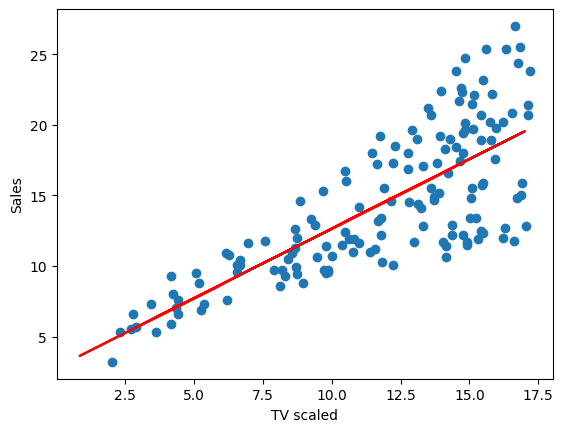

In [101]:
plt.scatter(X_train_sqrt, y_train)
plt.plot(X_test_sqrt, model.predict(X_test_sqrt), 'r')
plt.xlabel("TV scaled")
plt.ylabel("Sales")

In [102]:
y_pred=model.predict(X_test_sqrt)

In [103]:
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2.261003126373145
R2 Score 0.6947905866556843


No significative improvements..